In [58]:
#Gage Black
#801126936

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
file_path = '/content/drive/My Drive/Datasets/D3.csv'
dataset = pd.read_csv(file_path)

In [60]:
#dataset variables for training
x1 = dataset.values[:, 0]
x2 = dataset.values[:, 1]
x3 = dataset.values[:, 2]
Y = dataset.values[:, 3]
#inputs required
inputs = [x1,x2,x3]
m = len(Y)
n = [len(x1), len(x2), len(x3)]

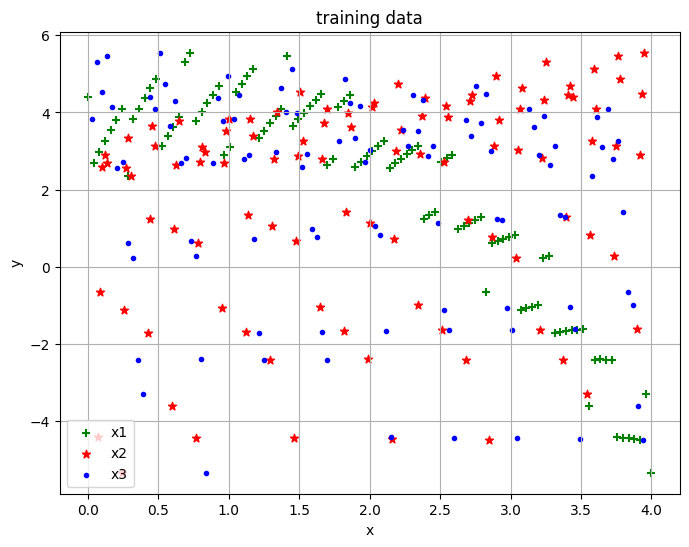

In [61]:
# Scatter plot
plt.scatter(x1, Y, color='green', marker='+', label="x1")
plt.scatter(x2, Y, color='red', marker='*', label="x2")
plt.scatter(x3, Y, color='blue', marker='.', label="x3")
# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (8, 6) #size of portrait
plt.xlabel('x') #label for X axis
plt.ylabel('y') #label for Y axis
plt.title('training data') #title of plot
plt.legend(loc="best")

# command to show the plot
plt.show()

In [62]:
#reshape inputs for x0-x2
def reshape_input(x, m):
    x_0 = np.ones((m, 1))
    x_1 = x.reshape(m, 1)
    x_2 = np.hstack((x_0, x_1))
    return x_2

for i in range(len(inputs)):
  inputs[i - 1] = reshape_input(inputs[i - 1],m)

In [63]:
#Parameters:

def comp_Cost(x, y, theta):
  #linear regression parameters
  #x is 2d array
  #m = num of training ex
  #n = num of features
  #y is 1d array
  #return j which is the scalar value

  predict = x.dot(theta) #predicting theta value
  error = np.subtract(predict, y)
  sqrError = np.square(error)
  J = 1 / (2 * m) * np.sum(sqrError)
  return J


In [64]:
def gradient_descent(x, y, theta, alpha, iteration):
  #linear regression parameters
  #x is 2d array
  #m = num of training ex
  #n = num of features
  #y is 1d array
  #return j which is the scalar value
  #theta = array of fitting parameters
  #alpha = learning rate
  #iterations = number of iterations
  #theta is returned with updated values and cost_history is returned which contains the cost for iterations

  m = len(Y)
  cost_history = np.zeros(iteration)


  for i in range(iteration):
        predict = x.dot(theta)
        error = np.subtract(predict, y)
        sumDelta = (alpha / m) * x.transpose().dot(error)
        theta = theta - sumDelta;
        cost_history[i] = comp_Cost(x, y, theta)

  return theta, cost_history


In [70]:
theta = np.zeros([3,2])
iteration = 1500 #how many iterations are performed
alpha = 0.025 #value of alpha
inputs[0][:5]


array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [66]:
#cost_array variable and for loop to find the final value of theta and cost_history
cost_array = np.zeros([len(inputs), iteration])
for i in range(len(inputs)):
  theta[i - 1], cost_history = gradient_descent(inputs[i - 1], Y, theta[i - 1], alpha, iteration)
  print('Final value of theta =', theta[i - 1])
  print('cost_history =', cost_history)
  cost_array[i-1] = cost_history

Final value of theta = [ 2.87138829 -0.52046951]
cost_history = [5.2455414  5.04078579 4.88976723 ... 3.62945112 3.62945112 3.62945112]
Final value of theta = [ 5.92786161 -2.03830265]
cost_history = [5.42181288 5.33519028 5.2601802  ... 0.98499308 0.98499308 0.98499308]
Final value of theta = [0.73605369 0.55761024]
cost_history = [4.9859713  4.60001669 4.32335657 ... 3.59936602 3.59936602 3.59936602]


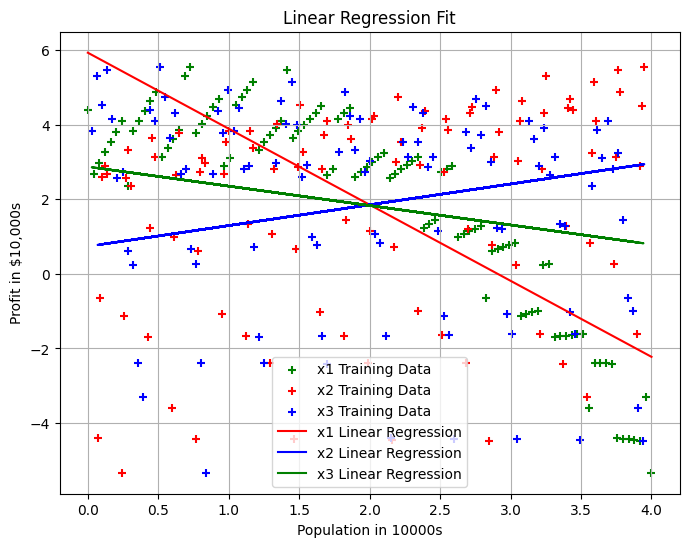

In [67]:
#line colors for x values or training data
plt.scatter(x1, Y, color='green', marker='+', label='x1 Training Data')
plt.scatter(x2, Y, color='red', marker='+', label='x2 Training Data')
plt.scatter(x3, Y, color='blue', marker='+', label='x3 Training Data')
# Line colors for linear regression
plt.plot(inputs[0][:, 1], inputs[0].dot(theta[0]), color='red', label='x1 Linear Regression')
plt.plot(inputs[1][:, 1], inputs[1].dot(theta[1]), color='blue', label='x2 Linear Regression')
plt.plot(inputs[2][:, 1], inputs[2].dot(theta[2]), color='green', label='x3 Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (8, 6)
plt.grid(True)
plt.xlabel('Population in 10000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()

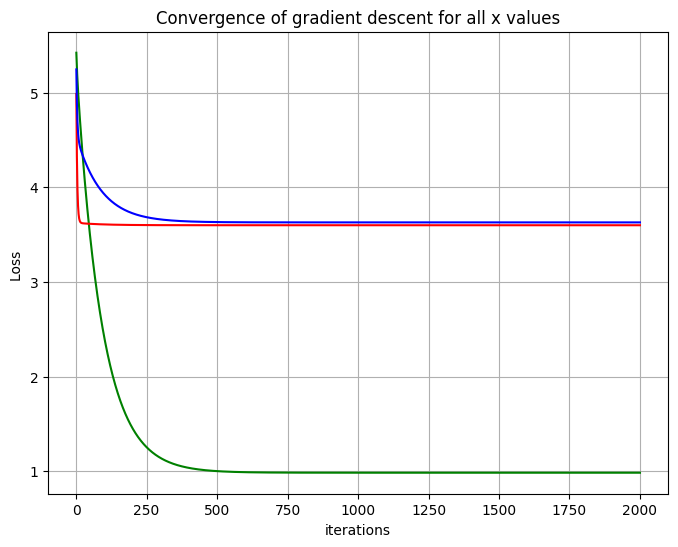

In [68]:
#graph colors
plt.plot(range(1, iteration + 1), cost_array[0], color='green')
plt.plot(range(1, iteration + 1), cost_array[1], color='red')
plt.plot(range(1, iteration + 1), cost_array[2], color='blue')
plt.rcParams["figure.figsize"] = (8, 6)
plt.grid(True)
#graph labels
plt.xlabel('iterations')
plt.ylabel('Loss ')
plt.title('Convergence of gradient descent for all x values')

# Show the plot
plt.show()

In [74]:
def train_with_all_features(X, y, alpha=0.025, iterations=1500):
    # Prepare data
    X_0 = np.ones((m, 1))
    X = np.hstack((X_0, X))

    # Initialize theta
    theta = np.zeros(X.shape[1])

    # Gradient descent
    theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

    # Plot loss over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, iterations + 1), cost_history, color='blue')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost (J)')
    plt.title(f'Convergence of Gradient Descent Using All Features')
    plt.show()

    return theta, cost_history[-1]

X_all_features = df[['x1', 'x2', 'x3']].values
theta_all, final_cost_all = train_with_all_features(X_all_features, y)
print(f'Final Linear Model: y = {theta_all[0]} + {theta_all[1]}*X1 + {theta_all[2]}*X2 + {theta_all[3]}*X3')

NameError: ignored

In [69]:
#Prediction for problem 2!
#testing 3 cases to predict the value of y for the 3 sets
def predict(theta, X):
    return np.dot(X, theta)
newValues = np.array[[1, 1, 1], [2, 0, 4], [3, 2, 1]]
newValues = np.hstack((np.ones((newValues.shape[0], 1)), newValues))

predictions = predict(theta_all, newValues)
print("\nPredictions:")
print(f"For (X1, X2, X3) values (1, 1, 1): y = {predictions[0]}")
print(f"For (X1, X2, X3) values (2, 0, 4): y = {predictions[1]}")
print(f"For (X1, X2, X3) values (3, 2, 1): y = {predictions[2]}")



ValueError: ignored